In [1]:
%matplotlib nbagg
import binascii
import logging

import matplotlib.pyplot as plt
import qcodes as qc
import numpy as np
import qcodes.instrument_drivers.tektronix.TPS2012 as tektps

from time import time, sleep

logger = logging.getLogger()
logger.setLevel(logging.DEBUG)

In [2]:
tps = tektps.TPS2012('TPS1', 'ASRL2::INSTR')

Connected to: TEKTRONIX TPS 2012B (serial:0, firmware:CF:91.1CT FV:v11.10) in 1.91s


In [3]:
# For good measurems, one may clear out old messages
tps.clear_message_queue()

## SETTING UP AN ACQUISITION
The driver supports basic setting of scales and triggers.

In this example, we want to look at a 10 kHz sine, 100 mVpp with a -50 mV offset.

The sine is on channel **1**, while the sync (0 V to 3 V square wave) signal from the function generator is on channel **2**.

In [4]:
# horizontal
tps.horizontal_scale.set(10e-6)
# channel 1
tps.ch1_scale.set(50e-3)  # V/div
tps.ch1_position.set(2)  # divisions
# channel 2
tps.ch2_scale.set(1)
tps.ch2_position.set(-3)
# trigger
tps.trigger_type.set('EDGE')
tps.trigger_source.set('CH2')
tps.trigger_level.set(1.5)

## ACQUIRING THE CURVES FROM THE OSCILLOSCOPE
There is a simple command to get two arrays for the horizontal and vertical data.

Because this is early beta version you must currently call `set_set_points` on each channel just before reading a trace from the channel. This is a limitation in the current dataset/loop of qcodes. You should also ensure that the scope has been triggered at these settings before calling set_set_points or you will get inconsitent data. 

In this example notebook we use force_trigger to ensure that we always have data when setting the set_points

In [5]:
tps.force_trigger()
sleep(10*tps.horizontal_scale.get_latest())
tps.ch1_curvedata.set_set_points()
tps.ch2_curvedata.set_set_points()
data = qc.Measure(tps.ch1_curvedata, tps.ch2_curvedata).run()

DataSet:
   mode     = DataMode.LOCAL
   location = '2017-01-20/16-25-36'
   <Type>   | <array_id>               | <array.name>      | <array.shape>
   Measured | TPS1_scope_measurement_0 | scope_measurement | (2500,)
   Measured | TPS1_scope_measurement_1 | scope_measurement | (2500,)
acquired at 2017-01-20 16:25:49


<IPython.core.display.Javascript object>


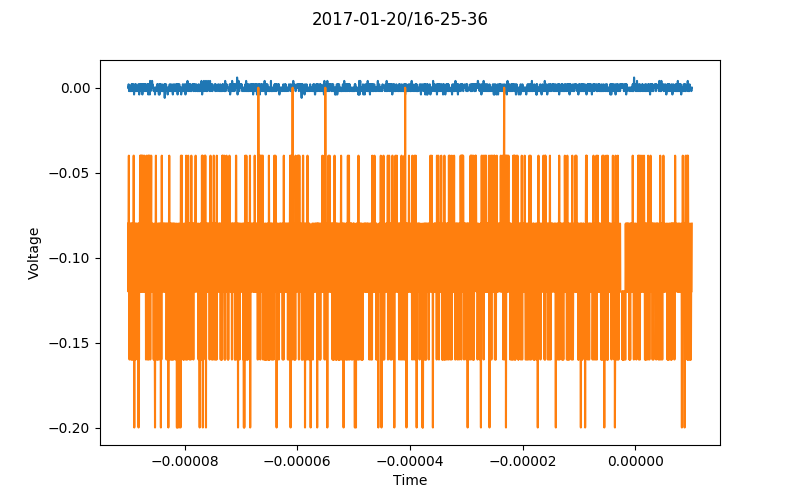

In [6]:
plot = qc.MatPlot()
plot.add(data.TPS1_scope_measurement_0)
plot.add(data.TPS1_scope_measurement_1)

Change horisontal scale and remember to call set_set_points to update the setpoint array

In [7]:
tps.horizontal_scale.set(1)

In [8]:
tps.force_trigger()
sleep(11*tps.horizontal_scale.get_latest())
tps.ch1_curvedata.set_set_points()
tps.ch2_curvedata.set_set_points()
data2 = qc.Measure(tps.ch1_curvedata, tps.ch2_curvedata).run()

DataSet:
   mode     = DataMode.LOCAL
   location = '2017-01-20/16-26-14'
   <Type>   | <array_id>               | <array.name>      | <array.shape>
   Measured | TPS1_scope_measurement_0 | scope_measurement | (2500,)
   Measured | TPS1_scope_measurement_1 | scope_measurement | (2500,)
acquired at 2017-01-20 16:26:27


<IPython.core.display.Javascript object>


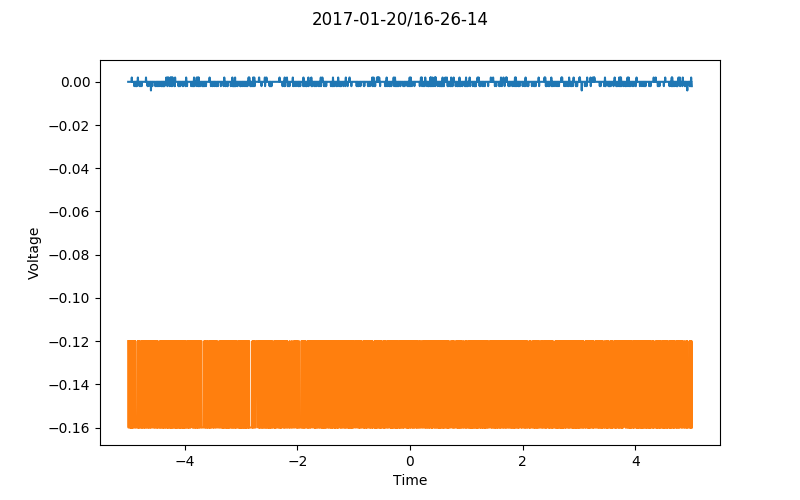

In [9]:
plot = qc.MatPlot()
plot.add(data2.TPS1_scope_measurement_0)
plot.add(data2.TPS1_scope_measurement_1)

In [10]:
tps.close()